# Making a striplog from tops

In [1]:
from striplog import Lexicon, Striplog, Legend

Read a simple csv of tops into a list.

In [2]:
topsfile = 'data/tops/P-129_tops.csv'

In [3]:
import csv

def get_tops(fname, wellid):
    """
    Get all the tops corrsponding to the first column name of well
    """
    tops = ''
    with open(fname, 'r') as f:
        for line in f.readlines():
            row = line.strip().split(',')
            if row[0] == wellid:
                name = row[1]
                md = row[5]
                tops += md + ', ' + str(name) +  '\n '
    return tops

topslist = get_tops(topsfile, 'P-129')

In [4]:
topslist

'698.33, Lower Windsor\n 806.04, Horton\n 946.52, Horton Bluff FM\n 1906.35, Maguma\n 1938.46, TD\n '

In [5]:
l = Lexicon.default()
l.formation = [r'\w+']

In [6]:
formations = Striplog.from_descriptions(topslist, lexicon=l, order='auto')
for frm in formations:
    print(frm.summary(fmt='{formation!t}'), frm.top.middle, '-',frm.base.middle)

107.71 m of Lower Windsor 698.33 - 806.04
140.48 m of Horton 806.04 - 946.52
959.83 m of Horton Bluff 946.52 - 1906.35
32.11 m of Maguma 1906.35 - 1938.46
1.00 m of Td 1938.46 - 1939.46


We need to make a legend for our formations, otherwise we won't be able to see it.

In [11]:
strat_str = """colour,  width, comp formation
        #FFFFFF, 1, 
        #9999ff, 1, lower windsor
        #ffcc00, 1, horton
        #cc6600, 1, horton bluff
        #660033, 1, meguma
"""

In [13]:
tops_legend = Legend.from_csv(strat_str)

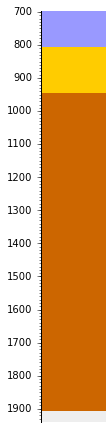

In [14]:
% matplotlib inline
formations.plot(legend=tops_legend, aspect=4.0)